# Plot analysis

This notebook is used for the data analysis and plot visualisation. 

## Requierements 

In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets

In [19]:
# load the data 
df_part4 = pd.read_csv('df_part4.csv')

In [24]:
df_part4.head(10)

,cell_id,cell_type,condition,win_ms,slope_V_per_s,mean_V,std_V,t_anchor_s,isi_ms,isi_cat
0,0,EXC,Pre-AP,2.5,1.104313,-0.035494,0.000825,1.355900,NaN,NaN
1,0,EXC,Baseline,2.5,0.269862,-0.043437,0.000207,10.010918,NaN,NaN
2,0,EXC,Pre-AP,3.5,0.644088,-0.035698,0.000770,1.355900,NaN,NaN
3,0,EXC,Baseline,3.5,0.034873,-0.045798,0.000055,0.887339,NaN,NaN
4,0,EXC,Pre-AP,4.5,0.355709,-0.035750,0.000686,1.355900,NaN,NaN
5,0,EXC,Baseline,4.5,0.425149,-0.037020,0.000590,10.486521,NaN,NaN
6,0,EXC,Pre-AP,2.5,1.499652,-0.040553,0.001170,2.994100,1638.2,Long
7,0,EXC,Baseline,2.5,0.015108,-0.046659,0.000039,15.862059,NaN,NaN
8,0,EXC,Pre-AP,3.5,1.013011,-0.040929,0.001154,2.994100,1638.2,Long
9,0,EXC,Baseline,3.5,-0.075667,-0.044638,0.000089,10.607930,NaN,NaN


In [42]:
df_sub = df_part4[df_part4['cell_type'] == 'PV']
df_sub['cell_id'].nunique()

161

## Analysis

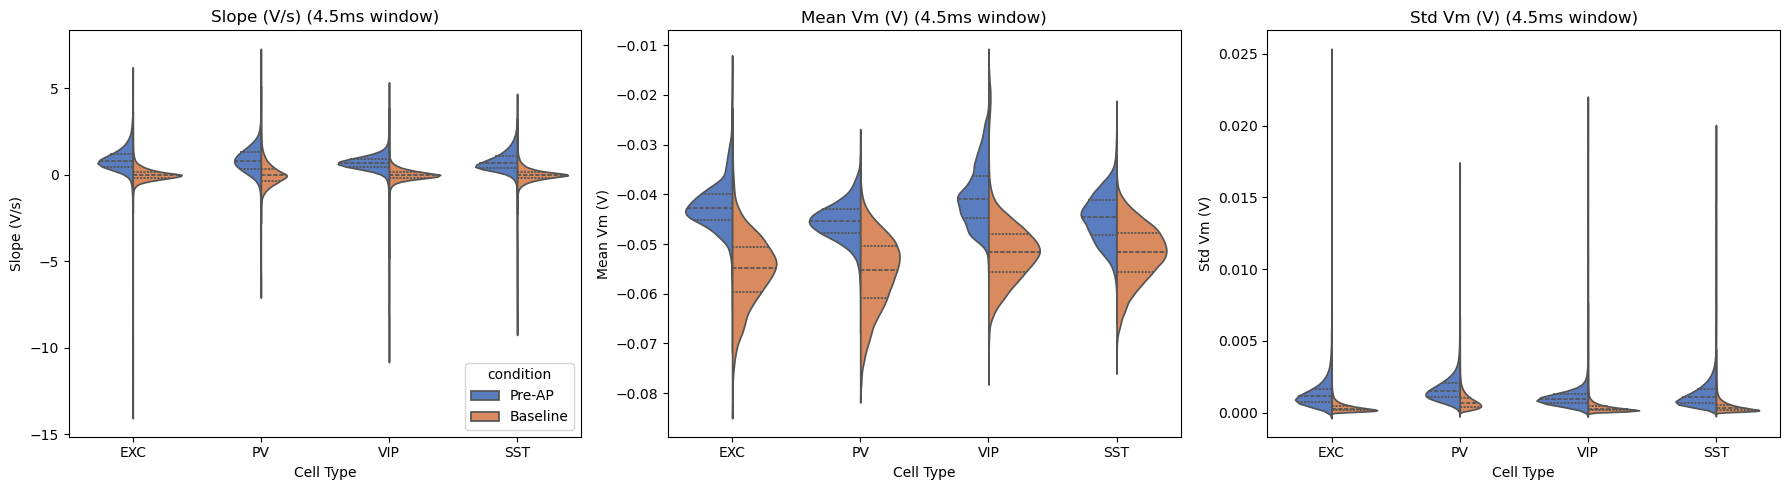

In [32]:
# =========================
# 2. VISUALIZATION: Pre-AP vs Baseline
# =========================

# Filter for a specific window size for the main plot (e.g., 10ms)
def pre_vs_baseline_feature(target_win, wanna_save = False): 

    df_plot = df_part4[df_part4['win_ms'] == target_win]
    
    # Define the features to plot
    features = [
        ('slope_V_per_s', 'Slope (V/s)'), 
        ('mean_V', 'Mean Vm (V)'), 
        ('std_V', 'Std Vm (V)')
    ]
    
    plt.figure(figsize=(18, 5))
    
    for i, (col, ylabel) in enumerate(features):
        plt.subplot(1, 3, i+1)
        
        # Use a boxplot or violinplot to compare distributions
        sns.violinplot(
            data=df_plot, 
            x='cell_type', 
            y=col, 
            hue='condition', 
            split=True,       # Split the violin to see Pre-AP vs Baseline side-by-side
            inner='quart',
            palette='muted'
        )
        
        plt.title(f"{ylabel} ({target_win}ms window)")
        plt.ylabel(ylabel)
        plt.xlabel("Cell Type")
        
        if i > 0:
            plt.legend([],[], frameon=False) # Hide legend for subsequent plots
    
    plt.tight_layout()
    if wanna_save:
        label = f'pre_vs_baseline_feature_for{target_win}.png'
        plt.savefig(label, dpi=300)
    plt.show()

pre_vs_baseline_feature(4.5, False)

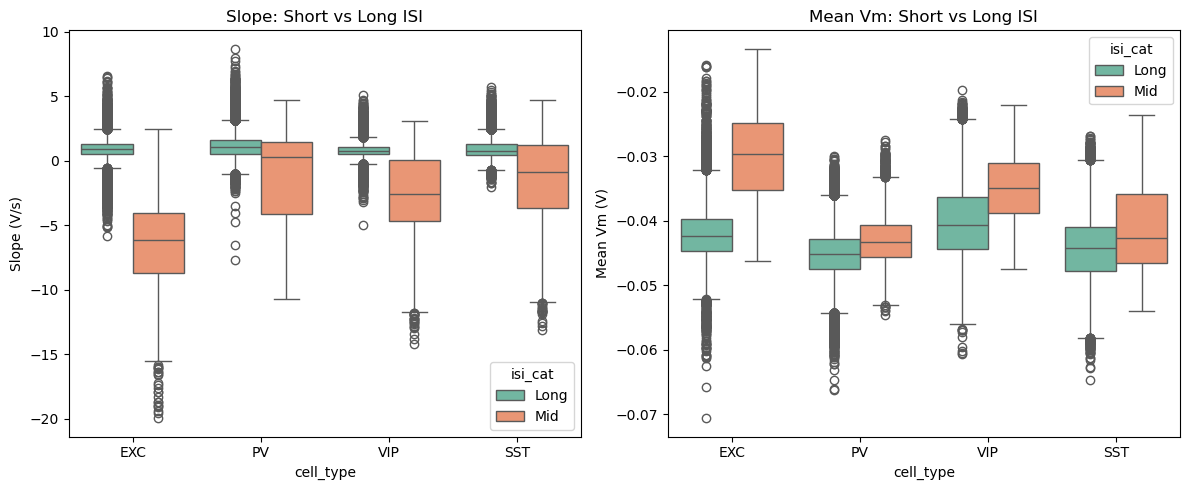

In [33]:
# =========================
# 3. VISUALIZATION: Impact of ISI (Pre-AP only)
# =========================

def plot_impact_ISI(win_ms, wanna_save = False):
    # We only look at "Pre-AP" condition to compare Short vs Long history
    df_isi = df_part4[
        (df_part4['condition'] == 'Pre-AP') & 
        (df_part4['win_ms'] == win_ms) & 
        (df_part4['isi_cat'].isin(['Short', 'Mid', 'Long'])) # Compare extremes
    ]
    
    plt.figure(figsize=(12, 5))
    
    # Plot Slope vs Cell Type, split by ISI Category
    plt.subplot(1, 2, 1)
    sns.boxplot(
        data=df_isi, 
        x='cell_type', 
        y='slope_V_per_s', 
        hue='isi_cat',
        palette='Set2'
    )
    plt.title("Slope: Short vs Long ISI")
    plt.ylabel("Slope (V/s)")
    
    # Plot Threshold (Anchor Vm) vs Cell Type, split by ISI
    # Note: t_anchor_s is time, you might want the voltage at anchor
    # But mean_V is a good proxy for the subthreshold level
    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=df_isi, 
        x='cell_type', 
        y='mean_V', 
        hue='isi_cat',
        palette='Set2'
    )
    plt.title("Mean Vm: Short vs Long ISI")
    plt.ylabel("Mean Vm (V)")
    
    plt.tight_layout()
    if wanna_save:
        plt.savefig('impact_ISI_on_features.png', dpi=300)
    plt.show()

plot_impact_ISI(3.5, False)